In [ ]:
import numpy as np 
import pandas as pd 
import torch
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import time
import copy
import pickle
# Classifier Libraries
from sklearn.ensemble import IsolationForest
import collections
from sklearn.svm import  SVC
from sklearn.tree import  DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb
# train/test split libraries and preprocessing
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, balanced_accuracy_score, cohen_kappa_score, average_precision_score
from collections import Counter

df = pd.read_csv('synthetic.csv')
df = df.rename(columns = {'nameOrig' : 'origin', 'oldbalanceOrg' : 'sender_old_balance', 'newbalanceOrig': 'sender_new_balance', 'nameDest' : 'destination', 'oldbalanceDest' : 'receiver_old_balance', 'newbalanceDest': 'receiver_new_balance', 'isFraud' : 'isfraud'})
df = df.drop(columns = ['step', 'isFlaggedFraud'], axis = 'columns')
cols = df.columns.tolist()
new_position = 3

cols.insert(new_position, cols.pop(cols.index('destination')))
df = df[cols]
data = df.copy()
data['type2'] = np.nan
data.loc[df.origin.str.contains('C') & df.destination.str.contains('C'), 'type2'] = 'CC'
data.loc[df.origin.str.contains('C') & df.destination.str.contains('M'), 'type2'] = 'CM'
data.loc[df.origin.str.contains('M') & df.destination.str.contains('C'), 'type2'] = 'MC'
data.loc[df.origin.str.contains('M') & df.destination.str.contains('C'), 'type2'] = 'MM'
cols = data.columns.tolist()
new_position = 1

cols.insert(new_position, cols.pop(cols.index('type2')))
data = data[cols]
data.drop(columns = ['origin','destination'], axis = 'columns', inplace = True)

fraud_trans = data[data['isfraud'] == 1]
valid_trans = data[data['isfraud'] == 0]

print('Number of fraud transactions according to type are below:\n', fraud_trans.type2.value_counts(), '\n')
print('Number of valid transactions according to type are below:\n', valid_trans.type2.value_counts())
data = pd.get_dummies(data, prefix = ['type', 'type2'], drop_first = True)
X = data.drop(columns=['isfraud'])
y = data.isfraud

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, stratify = data.isfraud)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [57]:
import pandas as pd
x = pd.read_csv("../KDD2023-DCdetector/dataset/PSM/test.csv")
y = pd.read_csv("../KDD2023-DCdetector/dataset/PSM/test_label.csv")

In [106]:
df2 = pd.read_csv('train.csv')

In [110]:
df2['Time'].values[-1]

45701

In [65]:
cols = [i for i in x][1:]
cols

['feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24']

In [66]:
y

,timestamp_(min),label
0,132480.0,0
1,132481.0,0
2,132482.0,0
3,132483.0,0
4,132484.0,0
...,...,...
87836,220316.0,0
87837,220317.0,0
87838,220318.0,0
87839,220319.0,0


In [68]:
x_ = [[j for j in x[i]] for i in cols]
y_ = [i for i in y['label']]

In [83]:
len([i for i in range(len(x_[0]))]), len(x_[0])

(87841, 87841)

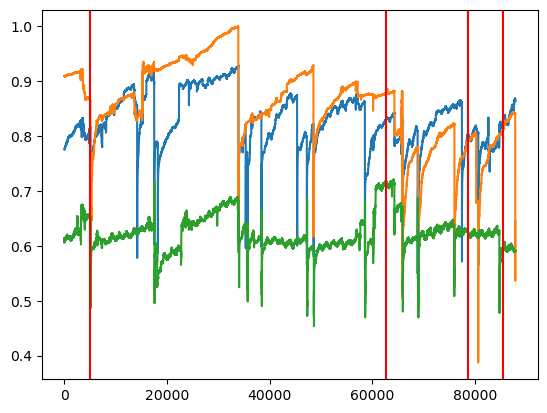

In [105]:
import matplotlib.pyplot as plt 
import random
for j in range(len(x_))[:3]:
    plt.plot([i for i in range(len(x_[j]))], x_[j])

count = 10
for idx, i in enumerate(y_):
    if count==0:
        continue
    
    if i == 1 and random.random()>0.9999:
        count-=1
        plt.axvline(idx, color='red')

In [1]:
import pandas as pd
df = pd.read_csv("train.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52881,45699,-0.674276,-2.694222,-0.425376,1.907082,-1.251059,-0.237627,1.326669,-0.349534,-0.178238,...,1.805095,0.561360,-0.452900,-0.779503,0.446582,0.067746,-0.558529,-0.133451,0.194031,955.97
52882,45700,1.233859,0.551763,-0.562644,0.764470,0.103147,-1.150261,0.256997,-0.128464,-0.313486,...,-0.107011,-0.110965,-0.334956,-0.087121,0.197023,0.515632,0.354093,-0.039393,0.031070,0.76
52883,45700,-2.988862,-1.278866,0.797251,0.448278,1.971132,-1.424829,-0.894910,0.645883,0.047048,...,0.855425,0.135969,-0.233273,-0.518708,-0.453003,0.824136,0.591710,0.193842,-0.316811,17.70
52884,45701,-0.670603,0.351279,2.654484,0.540362,-0.794883,0.326925,-0.181356,0.326033,1.075080,...,0.153901,-0.133913,0.175774,-0.104358,0.461700,-0.187949,0.331065,0.400730,0.205539,19.93


In [34]:
df1 = pd.read_csv("output.csv")
df2 = pd.read_csv("train.csv")
all_poss = []
for i in df2:
    if np.issubdtype(df2[i].dtype, np.number):
        all_poss.append(i)

if len(all_poss) == 0:
    all_poss.append(list(df2)[-1])
    
col = all_poss[len(all_poss)//2]
extracted_col = df2[col]
df1 = pd.concat([df1, extracted_col], axis=1)
df1

,Time,Class,V15,V15
0,122763.0,0.0,1.468177,1.468177
1,122763.0,0.0,0.635558,0.635558
2,122765.0,0.0,2.345865,2.345865
3,122765.0,0.0,-0.631418,-0.631418
4,122765.0,0.0,0.175121,0.175121
...,...,...,...,...
52881,NaN,NaN,NaN,1.306406
52882,NaN,NaN,NaN,0.349908
52883,NaN,NaN,NaN,-1.027360
52884,NaN,NaN,NaN,-1.956488


In [2]:
import pandas as pd
 
# Create the first DataFrame
df1 = pd.read_csv("output.csv")
df2 = pd.read_csv("train.csv")



In [3]:
df2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52881,45699,-0.674276,-2.694222,-0.425376,1.907082,-1.251059,-0.237627,1.326669,-0.349534,-0.178238,...,1.805095,0.561360,-0.452900,-0.779503,0.446582,0.067746,-0.558529,-0.133451,0.194031,955.97
52882,45700,1.233859,0.551763,-0.562644,0.764470,0.103147,-1.150261,0.256997,-0.128464,-0.313486,...,-0.107011,-0.110965,-0.334956,-0.087121,0.197023,0.515632,0.354093,-0.039393,0.031070,0.76
52883,45700,-2.988862,-1.278866,0.797251,0.448278,1.971132,-1.424829,-0.894910,0.645883,0.047048,...,0.855425,0.135969,-0.233273,-0.518708,-0.453003,0.824136,0.591710,0.193842,-0.316811,17.70
52884,45701,-0.670603,0.351279,2.654484,0.540362,-0.794883,0.326925,-0.181356,0.326033,1.075080,...,0.153901,-0.133913,0.175774,-0.104358,0.461700,-0.187949,0.331065,0.400730,0.205539,19.93


In [7]:
df3 = pd.read_csv("test_identity.csv")

In [45]:
x = df3.to_json(orient="split")
x = json.loads(x)

In [53]:
listcols

dict_keys(['TransactionID', 'id-01'])

In [18]:
import numpy as np
is_num = list(df2)[-1]
all_poss = []
for i in df2:
    if np.issubdtype(df2[i].dtype, np.number):
        all_poss.append(i)

col = all_poss[len(all_poss)//2]
col

'V15'

In [19]:
# Extract a column from the first DataFrame
extracted_col = df2[col]


df1 = pd.concat([df1, extracted_col], axis=1)
 
df1

,Time,Class,V15
0,122763,0,1.468177
1,122763,0,0.635558
2,122765,0,2.345865
3,122765,0,-0.631418
4,122765,0,0.175121
...,...,...,...
108370,172786,0,NaN
108371,172787,0,NaN
108372,172788,0,NaN
108373,172788,0,NaN
